In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_ab_test = pd.read_csv('ab_test_click_data.csv')
df_ab_test.head(5)

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00
2,3,1,exp,2024-01-01 00:02:00
3,4,0,exp,2024-01-01 00:03:00
4,5,1,exp,2024-01-01 00:04:00


In [3]:
df_ab_test.describe()

,user_id,click
count,20000.000000,20000.000000
mean,10000.500000,0.405250
std,5773.647028,0.490953
min,1.000000,0.000000
25%,5000.750000,0.000000
50%,10000.500000,0.000000
75%,15000.250000,1.000000
max,20000.000000,1.000000


In [5]:
df_ab_test.groupby('group').sum('click')

,user_id,click
group,,
con,150005000,1989
exp,50005000,6116


In [17]:
df_ab_test.head()

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00
2,3,1,exp,2024-01-01 00:02:00
3,4,0,exp,2024-01-01 00:03:00
4,5,1,exp,2024-01-01 00:04:00


In [19]:
df_ab_test.groupby(['group','click']).size().reset_index(name='count')


,group,click,count
0,con,0,8011
1,con,1,1989
2,exp,0,3884
3,exp,1,6116


In [21]:
df_ab_test.groupby(['group']).size()

group
con    10000
exp    10000
dtype: int64

In [6]:
import seaborn as sns

d:\3_conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\3_conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\3_conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\3_conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


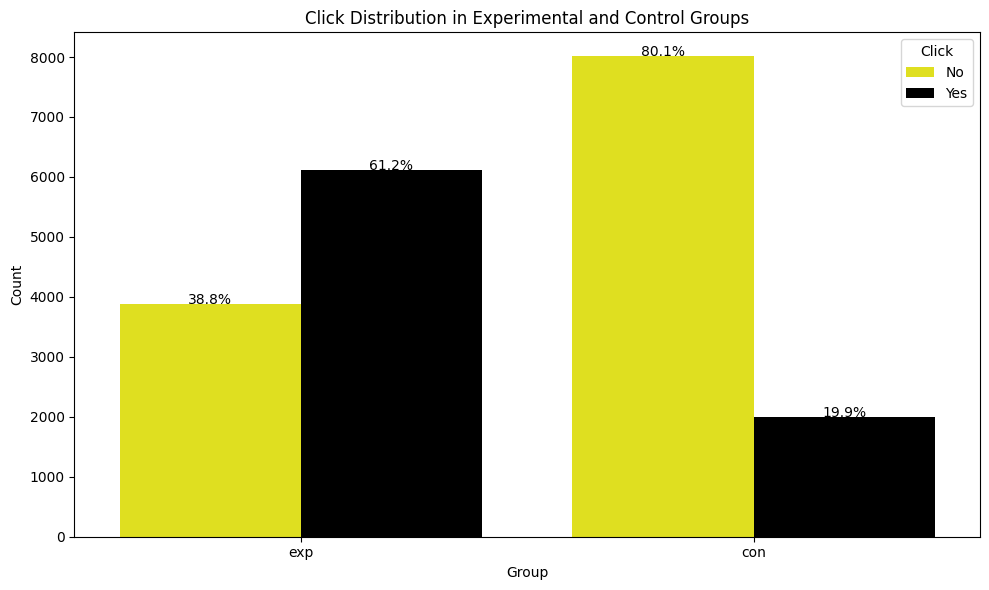

In [25]:
# Custom palette for yellow and black
palette ={0:'yellow', 1:'black'}  # Assuming 0 is for no-click, 1 for click

# Plotting the click distribution for each group with the custom colors
plt.figure(figsize=(10,6))
ax = sns.countplot(x='group',hue='click',data=df_ab_test,palette=palette)
plt.title('Click Distribution in Experimental and Control Groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Click',labels=['No','Yes'])

group_counts = df_ab_test.groupby(['group']).size()
group_click_counts = df_ab_test.groupby(['group','click']).size().reset_index(name='count')

for p in ax.patches:
    height = p.get_height()
    # Find the group and click type for the current bar
    group = 'exp' if p.get_x() < 0.5 else 'con'
    click = 1 if p.get_x() % 1 >0.5 else 0
    total = group_counts.loc[group]
    percentage = 100*height/total
    ax.text(p.get_x()+p.get_width()/2., height+5,f'{percentage:.1f}%',ha='center',color='black',fontsize=10)
plt.tight_layout()



In [34]:
df_ab_test

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00
2,3,1,exp,2024-01-01 00:02:00
3,4,0,exp,2024-01-01 00:03:00
4,5,1,exp,2024-01-01 00:04:00
...,...,...,...,...
19995,19996,1,con,NaN
19996,19997,1,con,NaN
19997,19998,1,con,NaN
19998,19999,0,con,NaN


In [37]:
# calculating the total number of clicks per group by summing 1's
X_con = df_ab_test.groupby('group')['click'].sum().loc['con']
X_con

1989

In [43]:
X_exp = df_ab_test.groupby('group')['click'].sum().loc['exp']
X_exp

6116

In [46]:
N_con = df_ab_test[df_ab_test['group']=='con'].count()
N_exp = df_ab_test[df_ab_test['group']=='exp'].count()
N_con,N_exp

(user_id      10000
 click        10000
 group        10000
 timestamp        0
 dtype: int64,
 user_id      10000
 click        10000
 group        10000
 timestamp    10000
 dtype: int64)

In [41]:
# printing this for visualization
print(df_ab_test.groupby('group')['click'].sum())
print(f'Number of Clicks in Control:{X_con}')
print(f'Number of Clicks in Experimental:{X_exp}')
print(f'Number of users in Control:{N_con}')
print(f'Number of users in Experimental:{N_exp}')

group
con    1989
exp    6116
Name: click, dtype: int64
Number of Clicks in Control:1989
Number of Clicks in Experimental:6116
Number of users in Control:user_id      10000
click        10000
group        10000
timestamp        0
dtype: int64
Number of users in Experimental:user_id      10000
click        10000
group        10000
timestamp    10000
dtype: int64


### Calculating Pooled Estimates for Clicks per Group

In [49]:
# computing the estimate click of probability per group
p_con_hat = X_con/N_con
P_exp_hat = X_exp/N_exp
p_pooled_hat = (X_con+X_exp)/(N_con+N_exp)
print(f'Pooled click probability:{p_pooled_hat}')

Pooled click probability:user_id      0.40525
click        0.40525
group        0.40525
timestamp    0.81050
dtype: float64


### Calculating Pooled Variance

In [54]:
# computing the estimate of pooled variance
pooled_variance = p_pooled_hat * (1-p_pooled_hat)*(1/N_con+1/N_exp)
print(f'p^_pooled is : \n{p_pooled_hat}')
print(f'\npooled_variance is :\n{pooled_variance}')

p^_pooled is : 
user_id      0.40525
click        0.40525
group        0.40525
timestamp    0.81050
dtype: float64

pooled_variance is :
user_id      0.000048
click        0.000048
group        0.000048
timestamp         inf
dtype: float64


### Calculating Standard Error and Test Statistics

In [55]:
from scipy.stats import norm

In [ ]:
# computing the standard error of the test
SE = np.sqrt(pooled_variance)
print(f'Standard Error is :{SE}')
 
# computing the test statistics of Z_test
Test_stat = (p_con_hat - P_exp_hat) / SE
print(f'Test Statistics for 2-sample z-test is : {Test_stat}')

# critical value of the z_test
